# **1. Perkenalan Dataset**


**Sumber Dataset** 

Dataset yang digunakan dalam project ini adalah StatLog Dataset (German Credit Data) yang bersumber dari UC Irvine Machine Learning Repository dengan tautan: [StatLog UC](https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data). Dataset ini juga dapat diakses dalam library ucimlrepo dengan id 144. 

**Penjelasan Dataset**

Dataset StatLog merupakan dataset yang digunakan untuk membangun sistem prediksi apakah suatu individu berisiko untuk hilang dari pembayaran kredit atau tidak. Dataset ini penting untuk melatih sistem automasi apakah nasabah dapat diberikan kredit ketika pengajuan atau perlu peninjauan ulang.

Dataset ini memiliki 20 atribut awal sebagai berikut: 
- Attribute 1:  (qualitative) Status of existing checking account
    - A11 :      ... <    0 DM
	- A12 : 0 <= ... <  200 DM
	- A13 :      ... >= 200 DM / salary assignments for at least 1 year
    - A14 : no checking account`
- Attribute 2:  (numerical) Duration in month
- Attribute 3:  (qualitative) Credit history
	- A30 : no credits taken/ all credits paid back duly
    - A31 : all credits at this bank paid back duly
    - A32 : existing credits paid back duly till now
    - A33 : delay in paying off in the past
    - A34 : critical account/  other credits existing (not at this bank)
- Attribute 4:  (qualitative) Purpose
    - A40 : car (new)
    - A41 : car (used)
    - A42 : furniture/equipment
    - A43 : radio/television
    - A44 : domestic appliances
    - A45 : repairs
    - A46 : education
    - A47 : (vacation - does not exist?)
    - A48 : retraining
    - A49 : business
    - A410 : others
- Attribute 5:  (numerical) Credit amount
- Attibute 6:  (qualitative) Savings account/bonds
    - A61 :          ... <  100 DM
    - A62 :   100 <= ... <  500 DM
    - A63 :   500 <= ... < 1000 DM
    - A64 :          .. >= 1000 DM
    - A65 :   unknown/ no savings account
- Attribute 7:  (qualitative) Present employment since
    - A71 : unemployed
    - A72 :       ... < 1 year
    - A73 : 1  <= ... < 4 years  
    - A74 : 4  <= ... < 7 years
    - A75 :       .. >= 7 years
- Attribute 8:  (numerical) Installment rate in percentage of disposable income
- Attribute 9:  (qualitative)
    - Personal status and sex
    - A91 : male   : divorced/separated
    - A92 : female : divorced/separated/married
    - A93 : male   : single
    - A94 : male   : married/widowed
    - A95 : female : single
- Attribute 10: (qualitative) Other debtors / guarantors
    - A101 : none
    - A102 : co-applicant
    - A103 : guarantor
- Attribute 11: (numerical) Present residence since
- Attribute 12: (qualitative) Property
    - A121 : real estate
    - A122 : if not A121 : building society savings agreement/ life insurance
    - A123 : if not A121/A122 : car or other, not in attribute 6
    - A124 : unknown / no property
- Attribute 13: (numerical) Age in years
- Attribute 14: (qualitative) Other installment plans 
	- A141 : bank
	- A142 : stores
	- A143 : none
- Attribute 15: (qualitative) Housing
	- A151 : rent
	- A152 : own
	- A153 : for free
- Attribute 16: (numerical) Number of existing credits at this bank
- Attribute 17: (qualitative) Job
	- A171 : unemployed/ unskilled  - non-resident
	- A172 : unskilled - resident
	- A173 : skilled employee / official
	- A174 : management/ self-employed/highly qualified employee/ officer
- Attribute 18: (numerical)
	- Number of people being liable to provide maintenance for
- Attribute 19: (qualitative)
	- Telephone
    - A191 : none
	- A192 : yes, registered under the customers name
- Attribute 20: (qualitative)foreign worker
	- A201 : yes
	- A202 : no

keseluruhan atribut tersebut digunakan untuk memprediksi target apakah pelanggan memiliki resiko kredit atau tidak (good/bad). Perlu dicatat bahwa dalam peoject ini, dilakukan beberapa penyesuaian dataset untuk memudahkan pembacaan dan analisis.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
from ucimlrepo import fetch_ucirepo
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 

df = pd.concat([statlog_german_credit_data.data.features, statlog_german_credit_data.data.targets], axis=1)
column_mapping = {
    "Attribute1": "checking_account_status",
    "Attribute2": "duration_months",
    "Attribute3": "credit_history",
    "Attribute4": "purpose",
    "Attribute5": "credit_amount",
    "Attribute6": "savings_account",
    "Attribute7": "employment_since",
    "Attribute8": "installment_rate",
    "Attribute9": "personal_status_sex",
    "Attribute10": "other_debtors",
    "Attribute11": "residence_since",
    "Attribute12": "property",
    "Attribute13": "age_years",
    "Attribute14": "other_installment_plans",
    "Attribute15": "housing",
    "Attribute16": "existing_credits",
    "Attribute17": "job",
    "Attribute18": "num_dependents",
    "Attribute19": "telephone",
    "Attribute20": "foreign_worker",
    "Target": "default",
    "class" : "credit_risk",
}

df = df.rename(columns=column_mapping)
df.head()


df.head()

,checking_account_status,duration_months,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status_sex,other_debtors,...,property,age_years,other_installment_plans,housing,existing_credits,job,num_dependents,telephone,foreign_worker,credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [3]:
# Mengganti kategori menjadi lebih mudah dipahami 
checking_account_map = {
    "A11": "negative_balance",
    "A12": "low_balance",
    "A13": "high_balance",
    "A14": "no_checking_account"
}

credit_history_map = {
    "A30": "no_credit_all_paid",
    "A31": "all_paid_this_bank",
    "A32": "existing_paid_duly",
    "A33": "payment_delay_past",
    "A34": "critical_account"
}

purpose_map = {
    "A40": "car_new",
    "A41": "car_used",
    "A42": "furniture_equipment",
    "A43": "radio_tv",
    "A44": "domestic_appliances",
    "A45": "repairs",
    "A46": "education",
    "A47": "vacation",
    "A48": "retraining",
    "A49": "business",
    "A410": "others"
}

savings_account_map = {
    "A61": "very_low_savings",
    "A62": "low_savings",
    "A63": "medium_savings",
    "A64": "high_savings",
    "A65": "no_savings"
}

employment_map = {
    "A71": "unemployed",
    "A72": "less_than_1_year",
    "A73": "1_to_4_years",
    "A74": "4_to_7_years",
    "A75": "over_7_years"
}

personal_status_map = {
    "A91": "male_divorced",
    "A92": "female_divorced_married",
    "A93": "male_single",
    "A94": "male_married_widowed",
    "A95": "female_single"
}

other_debtors_map = {
    "A101": "none",
    "A102": "co_applicant",
    "A103": "guarantor"
}

property_map = {
    "A121": "real_estate",
    "A122": "insurance_savings",
    "A123": "car_or_other",
    "A124": "no_property"
}

installment_plans_map = {
    "A141": "bank",
    "A142": "stores",
    "A143": "none"
}

housing_map = {
    "A151": "rent",
    "A152": "own",
    "A153": "free"
}

job_map = {
    "A171": "unemployed_unskilled_nonresident",
    "A172": "unskilled_resident",
    "A173": "skilled_employee",
    "A174": "management_self_employed"
}

telephone_map = {
    "A191": "no_phone",
    "A192": "has_phone"
}

foreign_worker_map = {
    "A201": "yes",
    "A202": "no"
}

credit_risk_map = {
    1: "good",
    2: "bad"
}

df_renamed = df.copy()
df_renamed["checking_account_status"] = df["checking_account_status"].map(checking_account_map)
df_renamed["credit_history"] = df["credit_history"].map(credit_history_map)
df_renamed["purpose"] = df["purpose"].map(purpose_map)
df_renamed["savings_account"] = df["savings_account"].map(savings_account_map)
df_renamed["employment_since"] = df["employment_since"].map(employment_map)
df_renamed["personal_status_sex"] = df["personal_status_sex"].map(personal_status_map)
df_renamed["other_debtors"] = df["other_debtors"].map(other_debtors_map)
df_renamed["property"] = df["property"].map(property_map)
df_renamed["other_installment_plans"] = df["other_installment_plans"].map(installment_plans_map)
df_renamed["housing"] = df["housing"].map(housing_map)
df_renamed["job"] = df["job"].map(job_map)
df_renamed["telephone"] = df["telephone"].map(telephone_map)
df_renamed["foreign_worker"] = df["foreign_worker"].map(foreign_worker_map)
df_renamed["credit_risk"] = df["credit_risk"].map(credit_risk_map)


df_renamed.head()

,checking_account_status,duration_months,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status_sex,other_debtors,...,property,age_years,other_installment_plans,housing,existing_credits,job,num_dependents,telephone,foreign_worker,credit_risk
0,negative_balance,6,critical_account,radio_tv,1169,no_savings,over_7_years,4,male_single,none,...,real_estate,67,none,own,2,skilled_employee,1,has_phone,yes,good
1,low_balance,48,existing_paid_duly,radio_tv,5951,very_low_savings,1_to_4_years,2,female_divorced_married,none,...,real_estate,22,none,own,1,skilled_employee,1,no_phone,yes,bad
2,no_checking_account,12,critical_account,education,2096,very_low_savings,4_to_7_years,2,male_single,none,...,real_estate,49,none,own,1,unskilled_resident,2,no_phone,yes,good
3,negative_balance,42,existing_paid_duly,furniture_equipment,7882,very_low_savings,4_to_7_years,2,male_single,guarantor,...,insurance_savings,45,none,free,1,skilled_employee,2,no_phone,yes,good
4,negative_balance,24,payment_delay_past,car_new,4870,very_low_savings,1_to_4_years,3,male_single,none,...,no_property,53,none,free,2,skilled_employee,2,no_phone,yes,bad


In [4]:
df_renamed.to_csv('D:/Asah/Submission MSML/Eksperimen_SML_Rafidah/german_credit_data.csv', index=False)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
# Univariate Analysis
numerical_columns = df_renamed.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df_renamed.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns[:-1]  # Exclude the target variable
target = 'credit_risk'

print(
    'numerical_columns', numerical_columns,
    '\ncategorical_columns', categorical_columns,
    '\ntarget', target,
)

numerical_columns Index(['duration_months', 'credit_amount', 'installment_rate',
       'residence_since', 'age_years', 'existing_credits', 'num_dependents'],
      dtype='object') 
categorical_columns Index(['checking_account_status', 'credit_history', 'purpose',
       'savings_account', 'employment_since', 'personal_status_sex',
       'other_debtors', 'property', 'other_installment_plans', 'housing',
       'job', 'telephone', 'foreign_worker'],
      dtype='object') 
target credit_risk


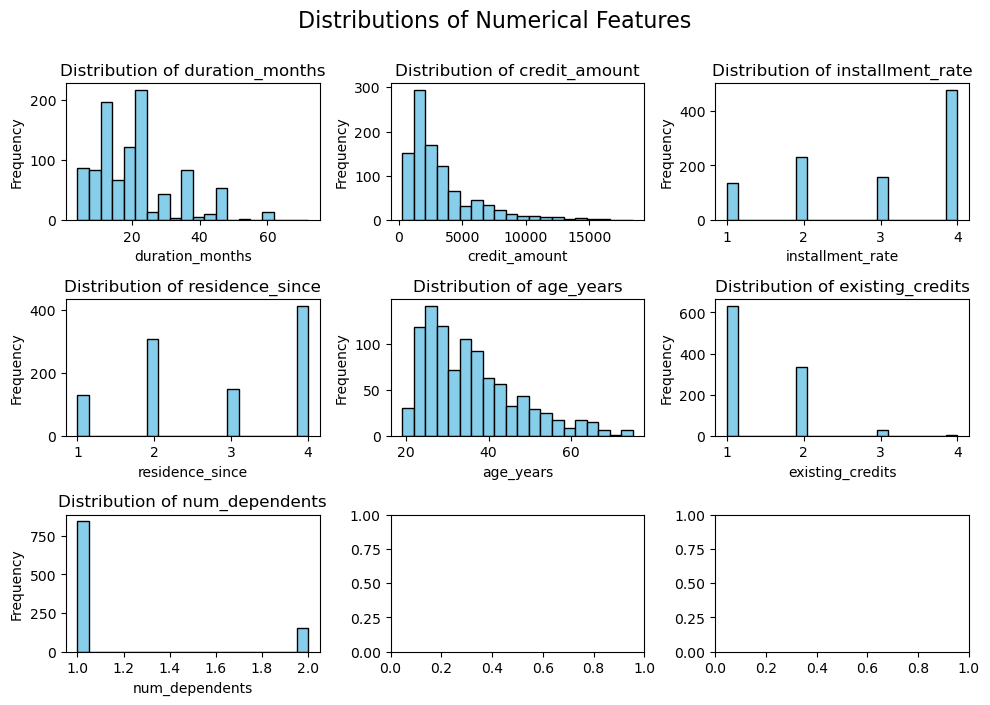

In [6]:
# Create subplots for numerical features
fig, axes = plt.subplots((len(numerical_columns)+2)//3 , 3, figsize=(10, len(numerical_columns)))
axes = axes.flatten()
for idx, col in enumerate(numerical_columns):
	axes[idx].hist(df_renamed[col], bins=20, color='skyblue', edgecolor='black')
	axes[idx].set_title(f'Distribution of {col}', fontsize=12)
	axes[idx].set_xlabel(col)
	axes[idx].set_ylabel('Frequency')

plt.suptitle('Distributions of Numerical Features', fontsize=16, y=1.001)
plt.tight_layout()
plt.show()

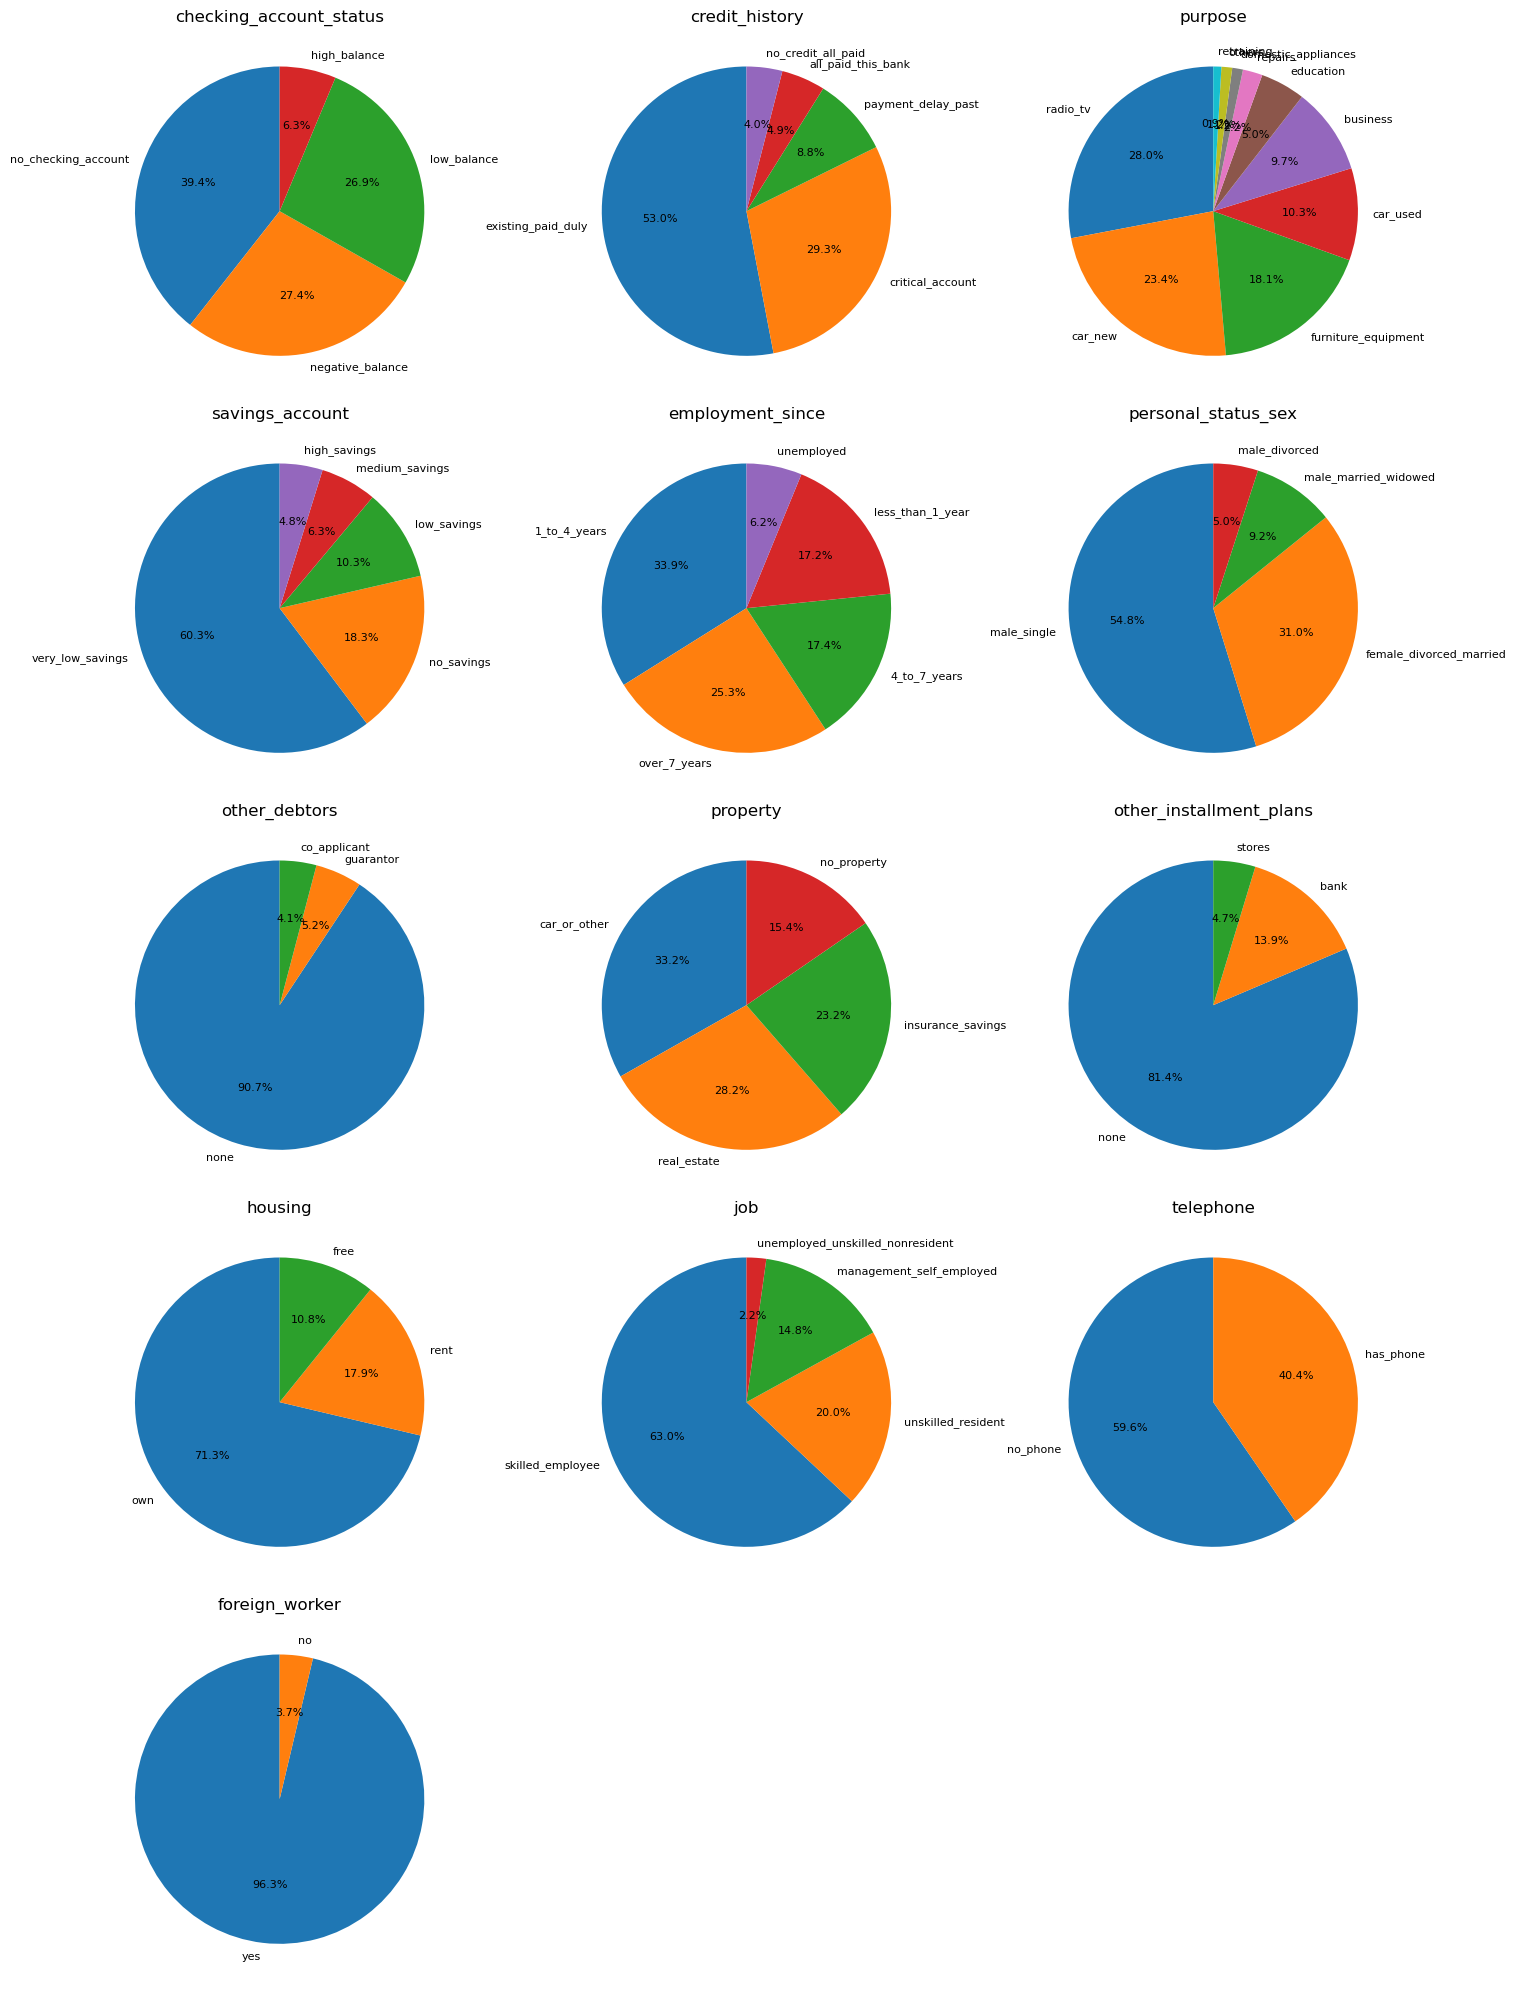

In [7]:
# Pie charts for categorical columns
n = len(categorical_columns)
ncols = 3
nrows = int(np.ceil(n / ncols))

fig, axes_pie = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
axes_pie = axes_pie.flatten()

for i, col in enumerate(categorical_columns):
    counts = df_renamed[col].value_counts()
    axes_pie[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8})
    axes_pie[i].set_title(col)

# Turn off any unused subplots
for j in range(i + 1, len(axes_pie)):
    axes_pie[j].axis('off')

plt.tight_layout()
plt.show()

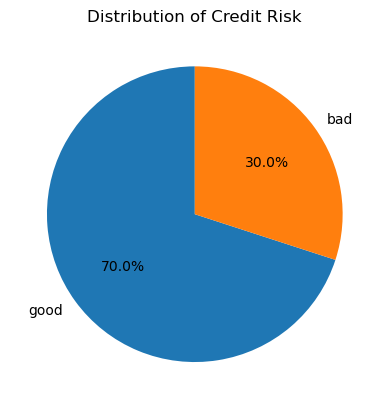

In [8]:
plt.pie(df_renamed['credit_risk'].value_counts(), labels=df_renamed['credit_risk'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Credit Risk')
plt.show()

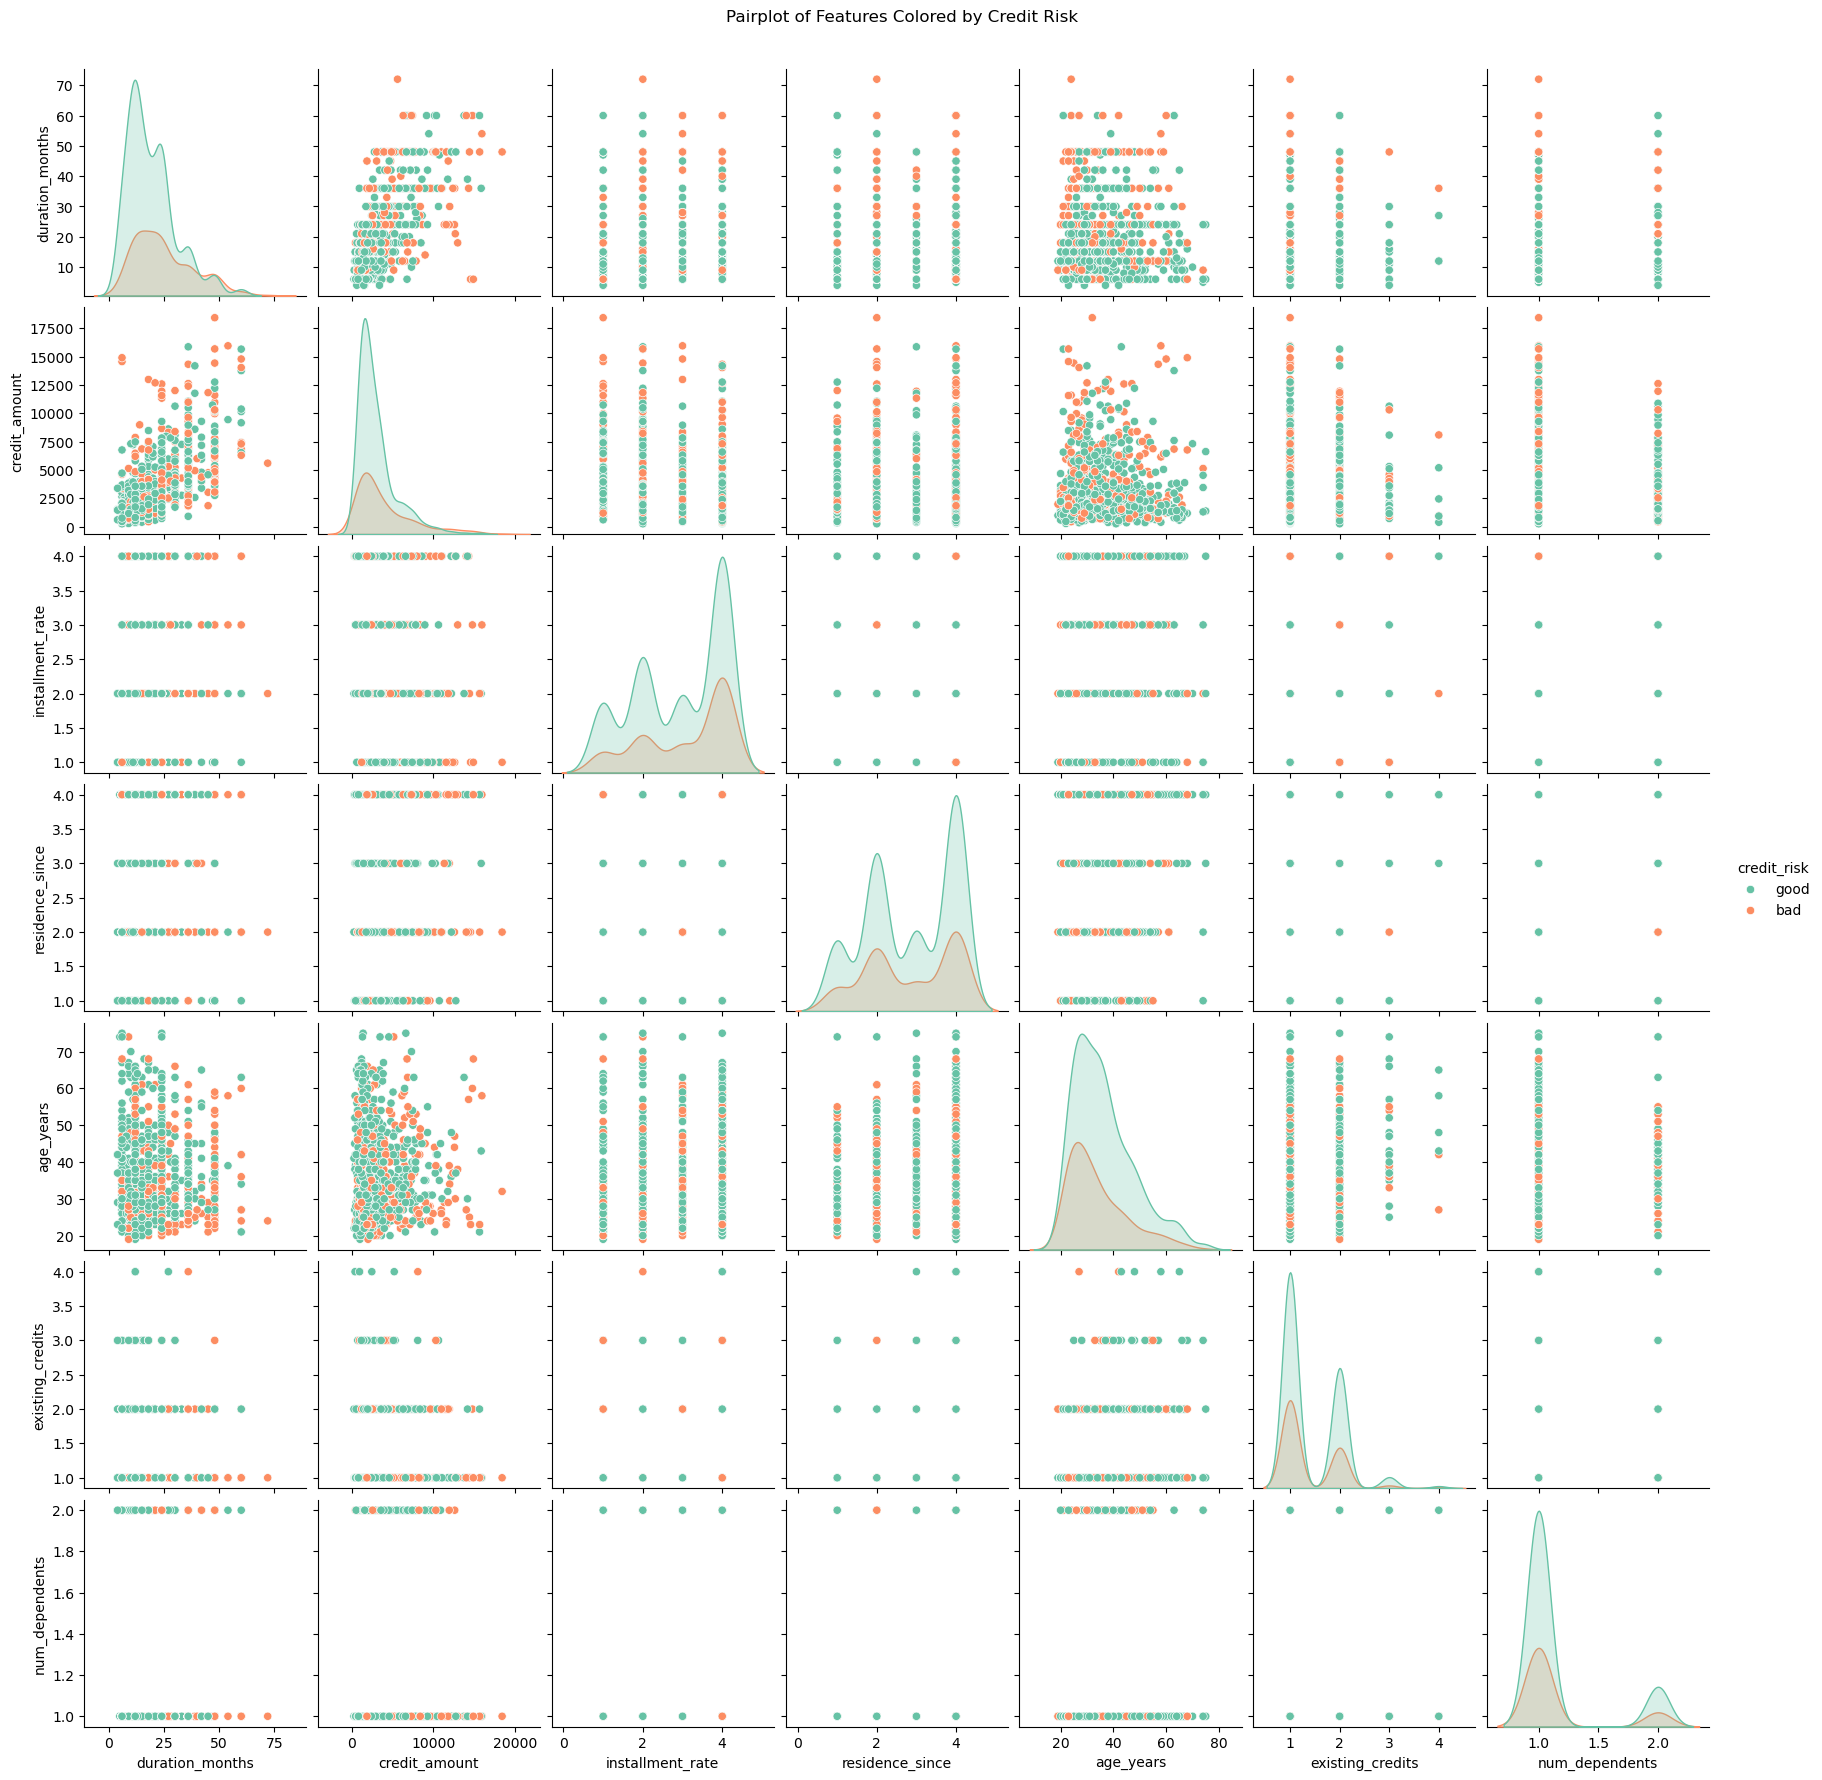

In [9]:
# Bivariate Analysis
sns.pairplot(df_renamed, hue='credit_risk', vars=numerical_columns, palette='Set2', diag_kind='kde')
plt.suptitle('Pairplot of Features Colored by Credit Risk', y=1.02)
plt.show()

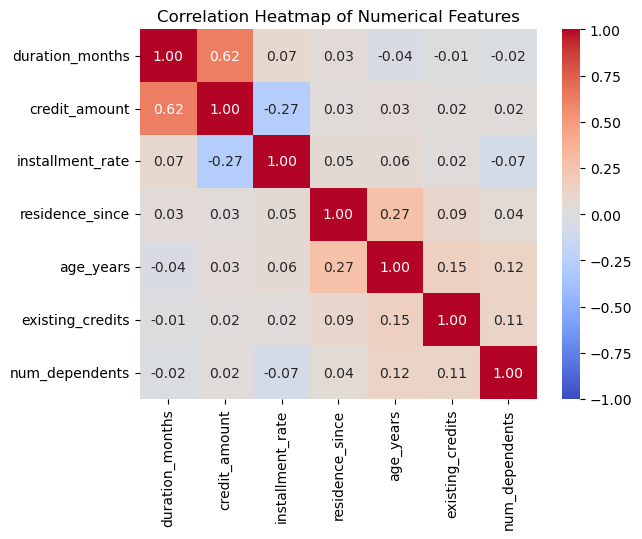

In [10]:
sns.heatmap(df_renamed[numerical_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm', vmin = -1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

#### Missing Values

In [11]:
# Check for missing values
df_renamed.isnull().sum()

checking_account_status    0
duration_months            0
credit_history             0
purpose                    0
credit_amount              0
savings_account            0
employment_since           0
installment_rate           0
personal_status_sex        0
other_debtors              0
residence_since            0
property                   0
age_years                  0
other_installment_plans    0
housing                    0
existing_credits           0
job                        0
num_dependents             0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [14]:
# If there's missing values
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

df_renamed[numerical_columns] = pd.DataFrame(numerical_imputer.fit_transform(df_renamed[numerical_columns]))
df_renamed[categorical_columns] = pd.DataFrame(categorical_imputer.fit_transform(df_renamed[categorical_columns]))

#### Duplicated Values

In [15]:
# Check for duplicate rows
df_renamed.duplicated().sum()

0

In [16]:
# If there's duplicated data
df_renamed = df_renamed.drop_duplicates()

#### Encoding Categorical Variables

In [17]:
# Encoding categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cols = pd.DataFrame(encoder.fit_transform(df_renamed[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns))
df_renamed = pd.concat([df_renamed.drop(columns=categorical_columns), encoded_cols], axis=1)

df_renamed.head()

,duration_months,credit_amount,installment_rate,residence_since,age_years,existing_credits,num_dependents,credit_risk,checking_account_status_low_balance,checking_account_status_negative_balance,...,property_real_estate,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled_employee,job_unemployed_unskilled_nonresident,job_unskilled_resident,telephone_no_phone,foreign_worker_yes
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,good,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,bad,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,good,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,good,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,bad,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


#### Scaling numerical variables

In [18]:
# Scaling numerical features
scaler = StandardScaler()
df_renamed[numerical_columns] = scaler.fit_transform(df_renamed[numerical_columns])
df_renamed.head()

,duration_months,credit_amount,installment_rate,residence_since,age_years,existing_credits,num_dependents,credit_risk,checking_account_status_low_balance,checking_account_status_negative_balance,...,property_real_estate,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled_employee,job_unemployed_unskilled_nonresident,job_unskilled_resident,telephone_no_phone,foreign_worker_yes
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,good,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,bad,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,good,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,good,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,bad,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


#### Features and Target, Training and Testing

In [19]:
X = df_renamed.drop(columns=['credit_risk'])
y = df_renamed['credit_risk']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=88, stratify=y
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (800, 48)
X_test shape: (200, 48)
